# Investiagting Netflix Movies

**Goal**: The goal of this project is to apply foundational Python, data manipulation and visualisation skills.

**Skills**: Python, Pandas and Matplotlib

**Problem**: Investigate if and why the average duration of movies has been declining on Netflix.

## Load data into a dictionary

In [1]:
# Create years and durations lists
release_years = [year for year in range(2011, 2021)]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {"release_years": release_years, "durations": durations}

# Print the dictionary
movie_dict

{'release_years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

## Create a DataFrame from a dictionary

In [2]:
# Import pandas
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
durations_df

,release_years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


## Visual inspection of the data

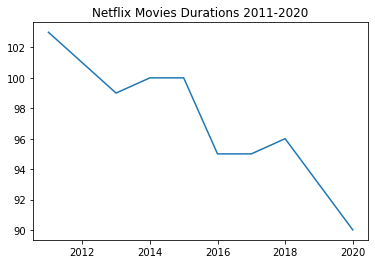

In [3]:
# Import matplotlib and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a lineplot of release_year and durations
plt.plot(durations_df.release_years, durations_df.durations)

# Create a title
plt.title("Netflix Movies Durations 2011-2020")

# Show the plot
plt.show()

## Loading Data from CSV

In [5]:
# Read the CSV as a DataFrame
netflix_df = pd.read_csv("datasets/netflix_titles.csv")

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Creating a "genre" column

In [28]:
# Split the "list_in" column to create a genre DataFrame
genre_df = netflix_df.listed_in.str.split(",", expand=True)

# Concatenate the new DataFrame with the netflix_df
netflix_df_new = pd.concat([netflix_df, genre_df], axis=1)

# Add "genre" column to the netflix_df_new
netflix_df_new = netflix_df_new.melt(id_vars=["show_id", "type", "title", "director", "cast", "country",
                                              "date_added", "release_year", "rating", "duration", "listed_in",
                                              "description"],
                                     var_name="_",
                                     value_name="genre")

# Drop unwanted columns
netflix_df_new = netflix_df_new.drop(labels=["rating", "listed_in", "_"], axis=1)

# Clean strings in genre
netflix_df_new["genre"] = netflix_df_new.genre.str.strip()

# Print the first five rows of the new DataFrame
netflix_df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,90 min,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,1 Season,"Feuds, flirtations and toilet talk go down amo...",Docuseries
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,2 Seasons,In a city of coaching centers known to train I...,International TV Shows


## Filtering for movies

In [62]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df_new[netflix_df_new["type"] == "Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title", "country", "genre", "release_year", "duration"]]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
0,Dick Johnson Is Dead,United States,Documentaries,2020,90 min
6,My Little Pony: A New Generation,NaN,Children & Family Movies,2021,91 min
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",Dramas,1993,125 min
9,The Starling,United States,Comedies,2021,104 min
12,Je Suis Karl,"Germany, Czech Republic",Dramas,2021,127 min


## Creating a scatter plot

title              0
country         1320
genre           5203
release_year       0
duration           9
dtype: int64


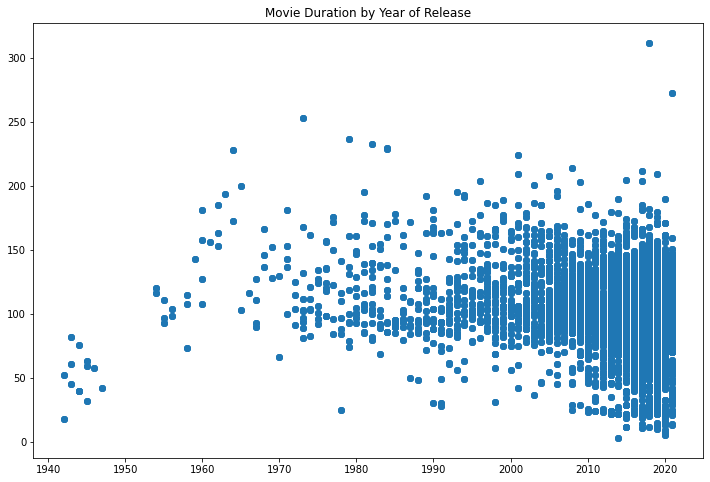

In [63]:
# Check missing values in the DataFrame
print(netflix_movies_col_subset.isna().sum())

# Drop all NaN values in the "duration" column
netflix_movies_col_subset = netflix_movies_col_subset.dropna(subset="duration")

# Keep numeric values only from the "duration" column
netflix_movies_col_subset["duration"] = netflix_movies_col_subset["duration"].str.extract("(\d+)").astype(int)

# Create a figure and increase the figure size
fig = plt.figure(figsize=(12, 8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset.release_year, netflix_movies_col_subset.duration)

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

## Digging Deeper

In [64]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset.duration < 60]

# Print the first 20 rows of short_movies
short_movies.head(20)

,title,country,genre,release_year,duration
45,My Heroes Were Cowboys,NaN,Documentaries,2021,23
71,A StoryBots Space Adventure,NaN,Children & Family Movies,2021,13
77,Little Singham - Black Shadow,NaN,Children & Family Movies,2021,48
279,Monster Hunter: Legends of the Guild,"United States, Japan",Action & Adventure,2021,59
470,Bridgerton - The Afterparty,NaN,Movies,2021,39
484,Lee Su-geun: The Sense Coach,NaN,Stand-Up Comedy,2021,46
495,Awon Boyz,NaN,Documentaries,2019,38
560,Audible,NaN,Documentaries,2021,39
694,Aziza,"Lebanon, Syria",Comedies,2019,13
695,Besieged Bread,NaN,Dramas,2015,12


## Marking non-feature films

In [72]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows():
    if row["genre"] == "Children & Family Movies":
        colors.append("red")
    elif row["genre"] == "Documentaries":
        colors.append("blue")
    elif (row["genre"] == "Stand-Up Comedy") or (row["genre"] == "Comedies"):
        colors.append("green")
    else:
        colors.append("gray")
        
# Inspect the first 10 values in the list
colors[:10]

['blue', 'red', 'gray', 'green', 'gray', 'red', 'blue', 'gray', 'green', 'red']

## Plotting with color

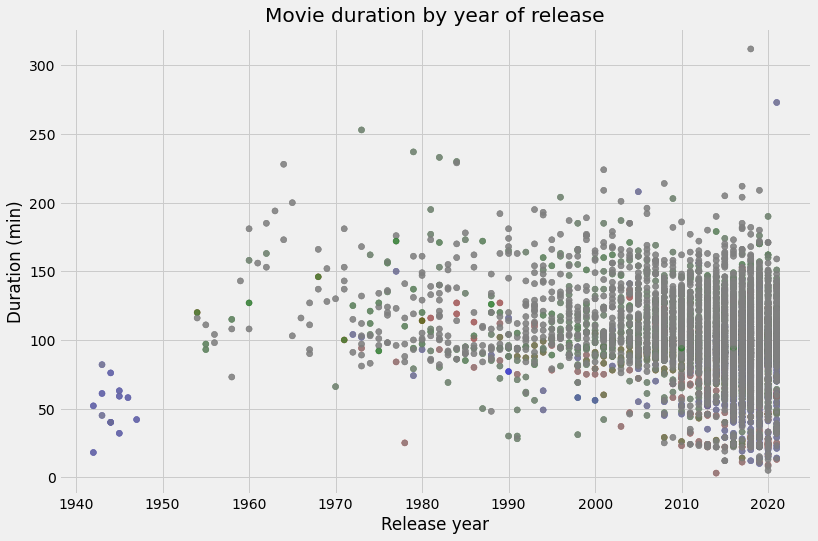

In [74]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset.release_year, netflix_movies_col_subset.duration, color=colors, alpha=0.5)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

## Conclusion

Non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. This is just a small piece of the equation until further analysis is done.